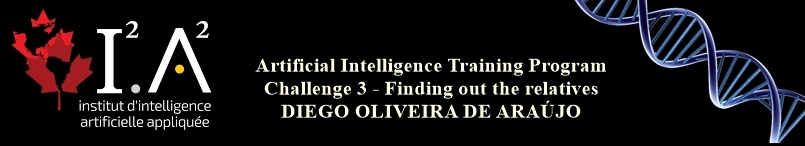

# Importing the libraries


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [71]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the data 

In [28]:
dataset = pd.read_excel('C:/Users/dell/Desktop/Genes/readcounts.xlsx')

In [29]:
dataset.head(8)

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H262,H263,H264,H265,H266,H267,H268,H269,H270,Unnamed: 49
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,1,0,1,0,2,0,0,1,0,NaN
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,932,360,450,484,926,803,630,537,582,NaN
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,286,137,90,105,275,101,56,87,81,NaN
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,157,34,20,15,139,54,25,21,47,NaN
5,ENSG00000000938,31895,23361,27944,41846,11929,6856,6756,7668,9315,...,37134,12673,9327,9554,11757,9733,4823,5754,9860,NaN
6,ENSG00000000971,2,3,0,6,14,16,15,4,1,...,8,8,12,19,5,1,8,14,2,NaN
7,ENSG00000001036,763,712,956,1104,136,227,217,905,94,...,902,139,223,283,639,111,113,108,599,NaN


# Preliminary check

In [30]:
dataset.index = dataset["Unnamed: 0"]
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('Unnamed: 49', axis=1, inplace=True)
dataset.head()

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,2,0,0,1,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,576,...,980,932,360,450,484,926,803,630,537,582
ENSG00000000457,189,114,110,289,186,148,169,258,145,131,...,117,286,137,90,105,275,101,56,87,81
ENSG00000000460,74,38,55,127,30,17,45,100,33,8,...,28,157,34,20,15,139,54,25,21,47


In [35]:
print(dataset.isnull().any())

H223    False
H224    False
H225    False
H226    False
H227    False
H228    False
H229    False
H230    False
H231    False
H232    False
H233    False
H234    False
H235    False
H236    False
H237    False
H238    False
H239    False
H240    False
H241    False
H242    False
H243    False
H244    False
H245    False
H246    False
H247    False
H248    False
H249    False
H250    False
H251    False
H252    False
H253    False
H254    False
H255    False
H256    False
H257    False
H258    False
H259    False
H260    False
H261    False
H262    False
H263    False
H264    False
H265    False
H266    False
H267    False
H268    False
H269    False
H270    False
dtype: bool


In [72]:
print("The sahpe of the dataset is row amount: %d and column amount is: %d"%(dataset.shape[0],dataset.shape[1]))

The sahpe of the dataset is row amount: 65215 and column amount is: 48


In [73]:
print("Therefore, the number of people is: %d, and the number of genes is: %d"%(dataset.shape[0],dataset.shape[1]))

Therefore, the number of people is: 65215, and the number of genes is: 48


# Preparing and transforming the data

In [78]:
#copying the dataset
dataset_copy = dataset.copy()
dataset_copy.head(5)

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,2,0,0,1,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,576,...,980,932,360,450,484,926,803,630,537,582
ENSG00000000457,189,114,110,289,186,148,169,258,145,131,...,117,286,137,90,105,275,101,56,87,81
ENSG00000000460,74,38,55,127,30,17,45,100,33,8,...,28,157,34,20,15,139,54,25,21,47


In [83]:
dataset_copy["TOTAL_GENE"] = dataset_copy.sum(axis=1)
dataset_copy.head(10)

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H262,H263,H264,H265,H266,H267,H268,H269,H270,TOTAL_GENE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,2,0,0,1,0,48
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,576,...,932,360,450,484,926,803,630,537,582,136152
ENSG00000000457,189,114,110,289,186,148,169,258,145,131,...,286,137,90,105,275,101,56,87,81,26188
ENSG00000000460,74,38,55,127,30,17,45,100,33,8,...,157,34,20,15,139,54,25,21,47,8624
ENSG00000000938,31895,23361,27944,41846,11929,6856,6756,7668,9315,3319,...,37134,12673,9327,9554,11757,9733,4823,5754,9860,3195824
ENSG00000000971,2,3,0,6,14,16,15,4,1,7,...,8,8,12,19,5,1,8,14,2,924
ENSG00000001036,763,712,956,1104,136,227,217,905,94,88,...,902,139,223,283,639,111,113,108,599,93184
ENSG00000001084,8963,26794,8027,716,745,3770,1260,1480,75,288,...,1109,1201,5345,1787,2958,278,850,304,475,886288


In [84]:
#Detecting number of null sets for all 
dataset_ausente = dataset_copy[dataset_copy['TOTAL_GENE'] == 0]
print(f"Quantity: {dataset_ausente.shape[0]}")

Quantity: 20537


In [85]:
#Removing missing ensembles
dataset_copy = dataset_copy[dataset_copy.TOTAL_GENE != 0]

In [86]:
#Removing the column 
dataset_copy.drop('TOTAL_GENE', axis='columns',inplace=True)

# Normalization of the data

In [106]:
#Code in R language

#```{r}
#library(Seurat)
#file2 <- data.frame(NormalizeData(t(file1)))
#```

In [95]:
del dataset_copy

In [96]:
#Reading the new dataset (normalized data)
dataset_copy = pd.read_csv("C:/Users/dell/Desktop/Genes/normalized.csv")
dataset_copy.index = dataset_copy["Unnamed: 0"]
dataset_copy.drop('Unnamed: 0', axis=1, inplace=True)
dataset_copy.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281891,ENSG00000281892,ENSG00000281896,ENSG00000281899,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281918,ENSG00000281920
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
H223,0.000000,0.0,5.881225,5.668783,5.841305,5.991986,4.472554,5.794610,6.005167,5.874698,...,0.0,8.112028,5.757685,0.00000,6.152201,0.0,0.0,5.323408,0.0,0.0
H224,0.000000,0.0,5.891018,5.165503,5.177574,5.681517,4.874205,5.725648,7.098597,5.961789,...,0.0,0.000000,5.703794,0.00000,0.000000,0.0,0.0,5.323408,0.0,0.0
H225,0.000000,0.0,5.707949,5.129993,5.545576,5.860092,0.000000,6.019495,5.895160,5.705528,...,0.0,0.000000,5.213436,0.00000,5.566116,0.0,0.0,0.000000,0.0,0.0
H226,6.726633,0.0,5.594473,6.092268,6.380214,6.262938,5.563525,6.163107,3.505994,5.464666,...,0.0,0.000000,5.948191,0.00000,6.844283,0.0,0.0,6.014114,0.0,0.0
H227,0.000000,0.0,4.978460,5.652839,4.942689,5.012682,6.408629,4.083943,3.544529,5.100183,...,0.0,0.000000,4.764556,9.21044,6.095167,0.0,0.0,0.000000,0.0,0.0


In [97]:
#Separating the data for the model
model_data = dataset_copy.iloc[:,0:].values
model_data 

array([[0.        , 0.        , 5.88122488, ..., 5.32340811, 0.        ,
        0.        ],
       [0.        , 0.        , 5.89101764, ..., 5.32340811, 0.        ,
        0.        ],
       [0.        , 0.        , 5.70794931, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 5.22621568, ..., 0.        , 0.        ,
        0.        ],
       [6.726633  , 0.        , 5.06742418, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 5.14740941, ..., 0.        , 0.        ,
        0.        ]])

# K-Means Model (predictive model)

In [93]:
#Number of cluster's default of the K-Means is 8 and init= random
k_means = KMeans(n_clusters = 8, init = 'random') 
#Creating the model
k_means.fit(model_data)
#Checking out
k_means.cluster_centers_

array([[ 1.68165825e+00,  0.00000000e+00,  5.23246574e+00, ...,
         3.10821966e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.34532660e+00,  0.00000000e+00,  5.52528718e+00, ...,
         2.34843449e+00,  0.00000000e+00, -2.77555756e-17],
       [ 0.00000000e+00,  4.25869659e+00,  5.52082732e+00, ...,
         5.87108624e+00,  0.00000000e+00,  4.60522018e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  5.51559296e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.40829125e-01,  1.06467415e+00,  4.97353802e+00, ...,
         4.55342459e+00,  0.00000000e+00,  2.77555756e-17],
       [ 2.91818837e+00,  1.11022302e-16,  5.35500618e+00, ...,
         3.45067447e+00,  7.09782764e-01,  2.77555756e-17]])

Elbow Method
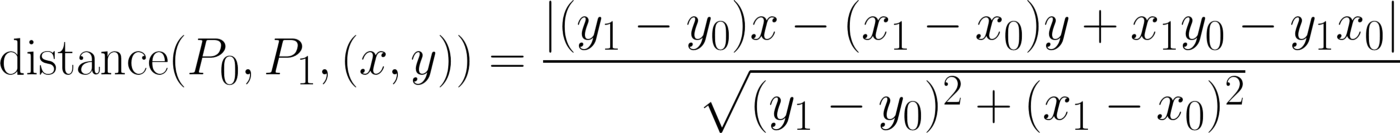

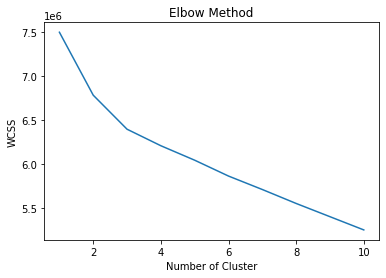

In [101]:
#That method is ideal to calculate the number of K more optimized
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(model_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

Code in R language: it was used 8 families for getting the result below
There are a lot of overlaps, but it is noticeable that there are 3 clusters

In [ ]:
#```{r}
#cluster.reads <- kmeans(file3, 8, nstart = 25)
#cluster.reads
#```

In [108]:
#```{r}
#fviz_cluster(cluster.reads, data = file3,
#             #palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
#             geom = "point",
#             ellipse.type = "convex", 
#             ggtheme = theme_bw()
#             )
#```

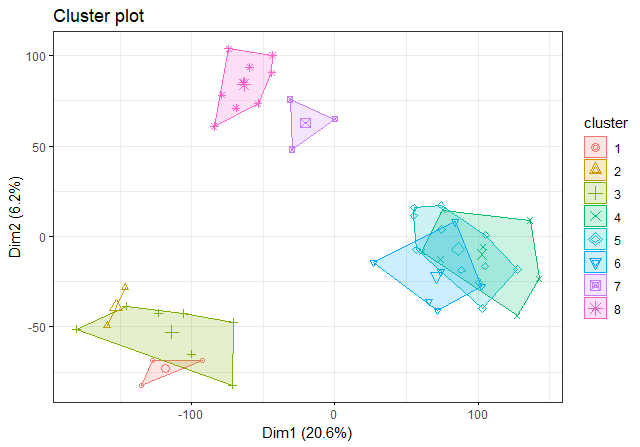

In [105]:
#Using the model with K=3
k_3 = KMeans(n_clusters = 3, init = 'random') 
k_3.fit(model_data)
k_3.cluster_centers_

array([[ 5.60552750e-01,  7.09782764e-01,  5.59828902e+00, ...,
         2.84426343e+00,  1.11022302e-16,  7.67536697e-01],
       [ 1.12110550e+00,  3.54891382e-01,  5.11369818e+00, ...,
         3.17366758e+00,  3.54891382e-01, -5.55111512e-17],
       [ 2.91818837e+00,  1.11022302e-16,  5.35500618e+00, ...,
         3.45067447e+00,  7.09782764e-01,  2.77555756e-17]])

Code in R language: it was used 3 families for getting the result below. The clustering is better than before.

In [107]:
#```{r}
#cluster.reads <- kmeans(file3, 3, nstart = 25)
#cluster.reads
#```

In [ ]:
#```{r}
#fviz_cluster(cluster.reads, data = file3,
#             #palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
#             geom = "point",
#             ellipse.type = "convex", 
#             ggtheme = theme_bw()
#             )
#```

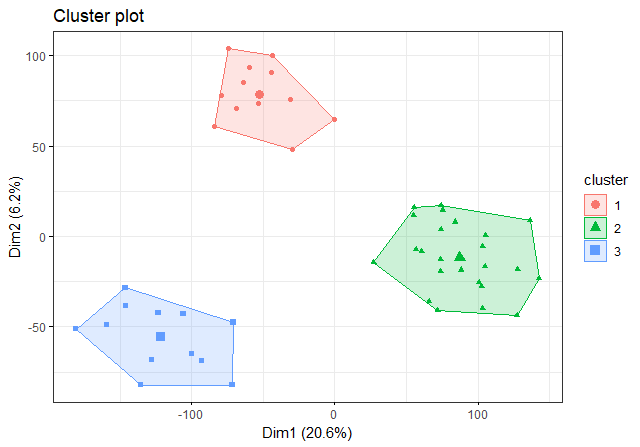

In [109]:
#Using the model with K=4
k_4 = KMeans(n_clusters = 4, init = 'random') 
k_4.fit(model_data)
k_4.cluster_centers_

array([[ 0.00000000e+00,  2.83913106e+00,  5.62757344e+00, ...,
         3.91405749e+00,  0.00000000e+00,  3.07014679e+00],
       [ 7.47403667e-01,  5.55111512e-17,  5.58852755e+00, ...,
         2.48766541e+00,  5.55111512e-17,  5.55111512e-17],
       [ 1.12110550e+00,  3.54891382e-01,  5.11369818e+00, ...,
         3.17366758e+00,  3.54891382e-01, -5.55111512e-17],
       [ 2.91818837e+00,  1.11022302e-16,  5.35500618e+00, ...,
         3.45067447e+00,  7.09782764e-01,  2.77555756e-17]])

Code in R language: it was used 4 families for getting the result below. The clustering is getting worse again, because there is overlap.

In [111]:
#```{r}
#cluster.reads <- kmeans(file3, 4, nstart = 25)
#cluster.reads
#```

In [112]:
#```{r}
#fviz_cluster(cluster.reads, data = file3,
#             #palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
#             geom = "point",
#             ellipse.type = "convex", 
#             ggtheme = theme_bw()
#             )
#```

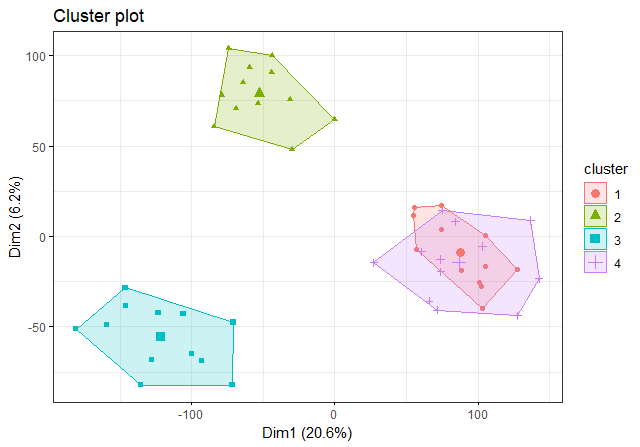

# Evaluation the model

In [113]:
#The K-Means model with k=3
k_3_evaluation = KMeans(n_clusters=3, init='random')
k_3_evaluation.fit(model_data)

KMeans(init='random', n_clusters=3)

In [123]:
metric = k_3_evaluation.labels_
print(f"Silhouette Score for K=3: {silhouette_score(model_data, metric, metric='euclidean')}")

Silhouette Score for K=3: 0.0629883514558936


In [116]:
#The K-Means model with k=4
k_4_evaluation = KMeans(n_clusters=4, init='random')
k_4_evaluation.fit(model_data)

KMeans(init='random', n_clusters=4)

In [117]:
metric = k_4_evaluation.labels_
print(f"Silhouette Score for K=4: {silhouette_score(model_data, metric, metric='euclidean')}")

Silhouette Score (K=4) : 0.055714798058731495


In [120]:
#The K-Means model with k=8
k_8_evaluation = KMeans(n_clusters=8, init='random')
k_8_evaluation.fit(model_data)

KMeans(init='random')

In [124]:
metric = k_8_evaluation.labels_
print(f"Silhouette Score for K=8: {silhouette_score(model_data, metric, metric='euclidean')}")

Silhouette Score for K=8: 0.02506314333035443


The highest value of K, the furthest the metric is from the ideal value. However, the best model for us is the K-Means model with K=3.

# Getting the families 

In [133]:
#List which has the attributes' names
list_ = dataset_copy.columns
#List which has the index's names
index= dataset_copy.index
clusters = pd.DataFrame(model_data, columns= list_, index=index)
clusters["FAMILY"] = k_3_evaluation.labels_
clusters.sample(3)

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281892,ENSG00000281896,ENSG00000281899,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281918,ENSG00000281920,FAMILY
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
H263,0.000000,0.0,4.670622,5.348327,5.067012,5.072793,5.850248,4.105398,4.011028,4.905388,...,0.000000,4.611826,0.0,5.343928,0.0,0.0000,5.323408,0.0,0.0,2
H234,6.726633,0.0,5.791182,5.939643,6.131626,5.075142,5.563525,6.409421,3.624656,5.473141,...,0.000000,5.453431,0.0,4.371029,0.0,8.6509,6.014114,0.0,0.0,0
H223,0.000000,0.0,5.881225,5.668783,5.841305,5.991986,4.472554,5.794610,6.005167,5.874698,...,8.112028,5.757685,0.0,6.152201,0.0,0.0000,5.323408,0.0,0.0,1


In [135]:
families = clusters["FAMILY"].unique()
families.sort()

for x in families:
  people = clusters[clusters["FAMILY"] == x]
  print(f"\nFAMILY {int(x) + 1}:\n{people.index.values}\n")


FAMILY 1:
['H226' 'H230' 'H234' 'H238' 'H242' 'H246' 'H250' 'H254' 'H258' 'H262'
 'H266' 'H270']


FAMILY 2:
['H223' 'H224' 'H225' 'H235' 'H236' 'H237' 'H247' 'H248' 'H249' 'H259'
 'H260' 'H261']


FAMILY 3:
['H227' 'H228' 'H229' 'H231' 'H232' 'H233' 'H239' 'H240' 'H241' 'H243'
 'H244' 'H245' 'H251' 'H252' 'H253' 'H255' 'H256' 'H257' 'H263' 'H264'
 'H265' 'H267' 'H268' 'H269']

